### I have decided for quantity prediction case to model different size of bags. 
### Predicting the bag sizes also can give insight on total bags selling. 
### Furthermore, since bags contain more avocados it is more economically and environmentally friendly to know quanity of sold bags especially for bigger ones. 
### Also, I always buy avocado in bags and for me it would be interesting to see amount of sold bags.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_google = pd.read_csv('GoogleData.csv')

In [3]:
df_google.head()

,Unnamed: 0,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,2015-01-04,46,76,84,8,51,10
1,2015-01-11,48,79,76,8,38,29
2,2015-01-18,48,82,84,9,66,27
3,2015-01-25,49,82,89,8,44,28
4,2015-02-01,52,81,82,7,46,42


In [4]:
df_google.columns

Index(['Unnamed: 0', 'avocado: (United States)', 'organic: (United States)',
       'avocado recipe: (United States)', 'avocado toast: (United States)',
       'avocado sandwich: (United States)',
       'organic avocado: (United States)'],
      dtype='object')

In [5]:
df_google.rename(columns={'Unnamed: 0': 'Date'},inplace=True)

In [6]:
df_google.head()

,Date,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,2015-01-04,46,76,84,8,51,10
1,2015-01-11,48,79,76,8,38,29
2,2015-01-18,48,82,84,9,66,27
3,2015-01-25,49,82,89,8,44,28
4,2015-02-01,52,81,82,7,46,42


In [7]:
df_prices = pd.read_csv('prices.csv')

In [8]:
df_prices.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,2015-01-04,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


#### 1. AveragePrice column represents prices from avocados sold in TotalVolume, 4046, 4225, 4770 columns
#### 2. Columns in TotalVolume, 4046, 4225, 4770 are represented in unit per avocado, so the sum of them should be predicted 

In [9]:
df_prices.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,2015-01-04,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


### Check for missing values

In [11]:
df_prices.isnull().sum()

Date              0
AveragePrice    902
TotalVolume     949
4046            900
4225            906
4770            916
TotalBags       890
SmallBags       934
LargeBags       947
XLargeBags      868
type              0
year              0
region            0
dtype: int64

In [46]:
df_prices.describe()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,24259.000000,2.421200e+04,2.426100e+04,2.425500e+04,2.424500e+04,2.427100e+04,2.422700e+04,2.421400e+04,24293.000000,25161.000000
mean,1.396018,9.170913e+05,2.981530e+05,2.958284e+05,2.246362e+04,2.950432e+05,2.124199e+05,7.589924e+04,4405.638467,2016.776877
std,0.384476,3.731937e+06,1.288583e+06,1.209445e+06,1.046621e+05,1.232967e+06,8.693043e+05,3.586079e+05,25806.499886,1.323978
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.323404e+04,8.225900e+02,3.061135e+03,0.000000e+00,7.319505e+03,4.770445e+03,2.358200e+02,0.000000,2016.000000
50%,1.360000,1.190528e+05,9.855110e+03,2.697755e+04,1.937600e+02,4.625771e+04,3.133734e+04,4.043680e+03,0.000000,2017.000000
75%,1.640000,4.733783e+05,1.141219e+05,1.498719e+05,6.078170e+03,1.394295e+05,1.008827e+05,3.050337e+04,313.890000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,7.864297e+06,844929.830000,2019.000000


### Replace missing values, but before that create IsNUll feature column

In [12]:
df_prices['AveragePrice'] = df_prices['AveragePrice'].fillna(method='ffill')

In [13]:
def fill_mising_bags(df):
    
    fill_TotalBags = df['SmallBags']+df['LargeBags']+df['XLargeBags']
    
    df['TotalBags'] = fill(df,fill_TotalBags,'TotalBags')
    
    fill_SmallBags = df['TotalBags']-(df['LargeBags']+df['XLargeBags'])
    
    df['SmallBags'] = fill(df,fill_SmallBags,'SmallBags')
    
    fill_LargeBags = df['TotalBags']-(df['SmallBags']+df['XLargeBags'])
    
    df['LargeBags'] = fill(df,fill_LargeBags,'LargeBags')
    
    fill_XLargeBags = df['TotalBags']-(df['SmallBags']+df['LargeBags'])
    
    df['XLargeBags'] = fill(df,fill_XLargeBags,'XLargeBags')
    
    return df

In [14]:
def fill(df,to_fill,col):
    
    df[col] = df[col].fillna(to_fill)
    
    return df[col]

In [15]:
df_prices = fill_mising_bags(df_prices)

In [16]:
def fill_total_units(df):
    
    fill_TotalVolume = df['4046']+df['4225']+df['4770']+df['TotalBags']
    
    df['TotalVolume'] = fill(df,fill_TotalVolume,'TotalVolume')
    
    fill_4046 = df['TotalVolume']-(df['4225']+df['4770']+df['TotalBags'])
    
    df['4046'] = fill(df,fill_4046,'4046')
    
    fill_4225 = df['TotalVolume']-(df['4046']+df['4770']+df['TotalBags'])
    
    df['4225'] = fill(df,fill_4225,'4225')
    
    fill_4770 = df['TotalVolume']-(df['4225']+df['4046']+df['TotalBags'])
    
    df['4770'] = fill(df,fill_4770,'4770')
    
    return df

In [17]:
df_prices = fill_total_units(df_prices)

In [18]:
df_prices.isnull().sum()

Date              0
AveragePrice      0
TotalVolume     136
4046            136
4225            132
4770            118
TotalBags       119
SmallBags       124
LargeBags       148
XLargeBags      123
type              0
year              0
region            0
dtype: int64

#### Now we are in better shape with missing values. Regarding the type and region I will skip them. There is analysis of relationships between them and volume and price in model_price_v2 notebook.

In [19]:
def remove_outliers(df,cols):
    
    df_new = pd.DataFrame()
    
    for col in cols:
        
        z = np.abs(stats.zscore(df[col]))
        
        temp = df.iloc[np.where(z < 3)[0]]
        
        df_new = pd.concat([df_new,temp],axis=0)
        
        return df_new

In [22]:
df_prices_filt = remove_outliers(df_prices,['AveragePrice','SmallBags','LargeBags','XLargeBags','TotalBags','4046','4225','4770','TotalVolume'])

In [23]:
df_prices_filt['Date'] = pd.to_datetime(df_prices_filt['Date'])

In [25]:
df_groupby = df_prices_filt.groupby('Date')['AveragePrice','4046','4225','4770','SmallBags','LargeBags','XLargeBags','TotalBags'].agg(['mean','min','max','std']).reset_index()

In [26]:
def levels(df):
    
    level0 = df.columns.get_level_values(0)

    level1 = df.columns.get_level_values(1)

    df.columns = level0 + '_' + level1
    
    return df

In [27]:
df_groupby = levels(df_groupby)

In [30]:
def create_percentage(df,ll,divide_col):

    for l in ll:
        
        df[l+'_ratio'] = round(df[l]/df['TotalBags_mean'],2)
        
    return df

In [31]:
ll = ['SmallBags_mean','LargeBags_mean','XLargeBags_mean']
df_groupby = create_percentage(df_groupby,ll,'TotalBags_mean')

In [32]:
ll1 = ['4046_mean','4225_mean','4770_mean','TotalBags_mean']
df_groupby = create_percentage(df_groupby,ll,'TotalVolume_mean')

In [34]:
df_groupby = df_groupby.rename(columns={'Date_':'Date'})

In [35]:
def plot_amount(df,col):
    
    df = df.sort_values('Date',ascending=True)
    
    fig,ax=plt.subplots(figsize=(10,8))
    
    ax=sns.scatterplot('Date',col,data=df)
    ax.set_xlim(df['Date'].min(),df['Date'].max())

/home/momir/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


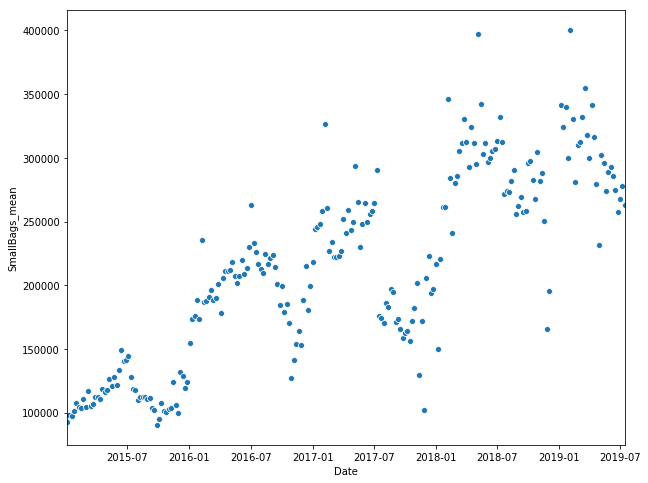

In [36]:
plot_amount(df_groupby,'SmallBags_mean')

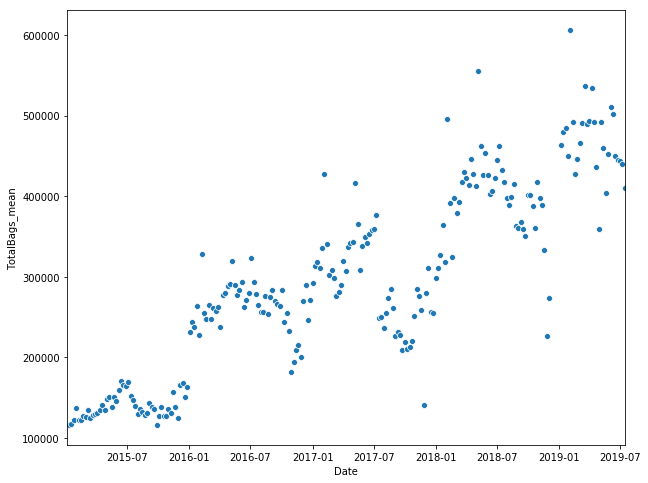

In [37]:
plot_amount(df_groupby,'TotalBags_mean')

### Here we see expressed sesonality and trend components. The similar pattern is valid like in case of prices with the difference that highest sold volumes are shifted more towards July (June, July, August), but September, October and November months are least popular.

In [38]:
def create_features(df, label=None):
    
    df1 = df.copy()
    """
    Creates time series features from datetime index
    """
    df1['Date'] = pd.to_datetime(df1['Date'])
    df1['weekofyear'] = df1['Date'].dt.weekofyear
    df1['month'] = df1['Date'].dt.month
    df1['year'] = df1['Date'].dt.year
    
   
    return df1

In [39]:
df_groupby = create_features(df_groupby)

#### Create custom qarters based on data analysis based on identified pattern.

In [46]:
def create_custom_trimester(df):
    '''
    Keys are month numbers ordered like January 1,.., December 12
    
    Values are groupes based on pattern above.
    '''
    month_dict = {6:1,7:1,8:1,9:2,10:2,11:2,12:3,1:3,2:3,3:4,4:4,5:4}
    
    df['selling_trimester'] = df['month'].map(month_dict)
    
    return df
    

In [47]:
df_groupby = create_custom_trimester(df_groupby)

In [48]:
df_groupby.head()

,Date,AveragePrice_mean,AveragePrice_min,AveragePrice_max,AveragePrice_std,4046_mean,4046_min,4046_max,4046_std,4225_mean,...,TotalBags_min,TotalBags_max,TotalBags_std,SmallBags_mean_ratio,LargeBags_mean_ratio,XLargeBags_mean_ratio,weekofyear,month,year,selling_trimester
0,2015-01-04,1.317130,0.65,2.32,0.375303,306465.358704,0.0,12357161.34,1.281802e+06,341213.318796,...,216.17,4498940.02,455100.700965,0.80,0.20,0.00,1,1,2015,3
1,2015-01-11,1.366019,0.61,2.29,0.359267,289035.714393,0.0,11544810.53,1.211237e+06,303781.757778,...,33.33,4517384.18,459283.416108,0.84,0.16,0.00,2,1,2015,3
2,2015-01-18,1.395093,0.67,2.35,0.365824,297221.520000,0.0,11858139.34,1.241577e+06,298666.926698,...,112.58,4652069.81,468580.984611,0.83,0.17,0.00,3,1,2015,3
3,2015-01-25,1.399630,0.61,2.29,0.362146,301877.024673,0.0,12167445.03,1.272225e+06,267862.244167,...,80.00,4800192.94,484252.430228,0.83,0.17,0.00,4,1,2015,3
4,2015-02-01,1.251389,0.56,1.98,0.357006,465675.823704,0.0,18933038.04,1.966301e+06,469409.541481,...,96.67,5384427.62,542385.400946,0.79,0.21,0.01,5,2,2015,3


In [49]:
df_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 40 columns):
Date                     233 non-null datetime64[ns]
AveragePrice_mean        233 non-null float64
AveragePrice_min         233 non-null float64
AveragePrice_max         233 non-null float64
AveragePrice_std         233 non-null float64
4046_mean                233 non-null float64
4046_min                 233 non-null float64
4046_max                 233 non-null float64
4046_std                 233 non-null float64
4225_mean                233 non-null float64
4225_min                 233 non-null float64
4225_max                 233 non-null float64
4225_std                 233 non-null float64
4770_mean                233 non-null float64
4770_min                 233 non-null float64
4770_max                 233 non-null float64
4770_std                 233 non-null float64
SmallBags_mean           233 non-null float64
SmallBags_min            233 non-null float64
SmallBags_max 

#### SmallBags_mean is mean of weekly purchase and then we take those means within 3 months period to calculate trimester mean.

In [50]:
def calc_trimester_stats(df):
    
    df1 = df.groupby(['selling_trimester','year'])['SmallBags_mean','LargeBags_mean','XLargeBags_mean','TotalBags_mean'].agg(['min','max','mean']).reset_index()
    
    return df1

In [51]:
df_trimester_grouped = calc_trimester_stats(df_groupby)

In [52]:
df_trimester_grouped = levels(df_trimester_grouped)

In [53]:
df_trimester_grouped.head()

,selling_trimester_,year_,SmallBags_mean_min,SmallBags_mean_max,SmallBags_mean_mean,LargeBags_mean_min,LargeBags_mean_max,LargeBags_mean_mean,XLargeBags_mean_min,XLargeBags_mean_max,XLargeBags_mean_mean,TotalBags_mean_min,TotalBags_mean_max,TotalBags_mean_mean
0,1,2015,109582.662150,148863.688598,125449.659068,16679.820849,26746.066852,21644.683598,497.512593,1700.987453,897.927148,128493.652925,169974.616852,147860.688263
1,1,2016,209107.175888,262695.718286,222794.382364,38153.062315,64792.684860,46707.583663,2828.795370,13648.280288,7294.185393,254166.506729,323318.598598,275731.015682
2,1,2017,170159.382778,290153.068208,220320.459326,59303.705670,90311.048286,76072.245105,5448.027685,9509.183619,7417.345775,236791.250370,377092.006355,303870.946230
3,1,2018,255801.251121,332021.790741,293286.197444,95796.160648,139421.203241,113565.814626,5060.841296,10303.531574,7017.788114,363165.527664,462484.188148,413869.800184
4,1,2019,257571.508148,293038.110741,274271.087139,131898.931048,199581.914352,166826.780579,13331.685556,21306.130370,16249.126181,409812.475238,510963.976111,457346.993898


In [54]:
df_trimester_grouped.rename(columns={'selling_trimester_': 'selling_trimester','year_':'year'},inplace=True)

In [55]:
df_all_grouped = pd.merge(df_groupby,df_trimester_grouped,on=['selling_trimester','year'],how='left')

In [56]:
df_all_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 52 columns):
Date                     233 non-null datetime64[ns]
AveragePrice_mean        233 non-null float64
AveragePrice_min         233 non-null float64
AveragePrice_max         233 non-null float64
AveragePrice_std         233 non-null float64
4046_mean                233 non-null float64
4046_min                 233 non-null float64
4046_max                 233 non-null float64
4046_std                 233 non-null float64
4225_mean                233 non-null float64
4225_min                 233 non-null float64
4225_max                 233 non-null float64
4225_std                 233 non-null float64
4770_mean                233 non-null float64
4770_min                 233 non-null float64
4770_max                 233 non-null float64
4770_std                 233 non-null float64
SmallBags_mean           233 non-null float64
SmallBags_min            233 non-null float64
SmallBags_max 

### Add Google data

In [57]:
df_google['Date'] = pd.to_datetime(df_google['Date'])

In [58]:
df_all = pd.merge(df_all_grouped,df_google,on='Date',how='inner')

In [59]:
def drop_high_correlations(df):
    
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.9
    to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]
    
    df1 = df.drop(df[to_drop], axis=1)
    
    return df1

In [60]:
df_all_filt = drop_high_correlations(df_all)

In [64]:
cols = df_all_filt.columns.tolist()

In [65]:
cols

['Date',
 'AveragePrice_mean',
 'AveragePrice_min',
 'AveragePrice_max',
 'AveragePrice_std',
 '4046_mean',
 '4046_min',
 '4225_mean',
 '4225_min',
 '4770_mean',
 '4770_min',
 'SmallBags_mean',
 'SmallBags_min',
 'LargeBags_mean',
 'LargeBags_min',
 'XLargeBags_mean',
 'XLargeBags_min',
 'TotalBags_min',
 'SmallBags_mean_ratio',
 'LargeBags_mean_ratio',
 'XLargeBags_mean_ratio',
 'weekofyear',
 'year',
 'selling_trimester',
 'SmallBags_mean_min',
 'SmallBags_mean_max',
 'XLargeBags_mean_min',
 'XLargeBags_mean_max',
 'avocado: (United States)',
 'organic: (United States)',
 'avocado recipe: (United States)',
 'avocado toast: (United States)',
 'avocado sandwich: (United States)',
 'organic avocado: (United States)']

In [62]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, df_cols, n_in=1, n_out=1,dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]

    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (df_cols[j], i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (df_cols[j])) for j in range(n_vars)]
        else:
            names += [('%s(t+%d)' % (df_cols[j], i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


### For this case I will frame lagged features as using input sequence of 6 weeks to predict next 6 weeks of sold bags.

In [67]:
df_lagged = df_all_filt.copy()
df_lagged = df_lagged.set_index('Date')
values = df_lagged.values
cols = df_lagged.columns
n_pred = 6
n_prev = 6
data = series_to_supervised(values, cols, 6, 6)

In [ ]:
# I will first

In [68]:
prediction_window = df_all_filt.Date.iloc[-n_pred:].values

In [69]:
prediction_window

array(['2019-06-09T00:00:00.000000000', '2019-06-16T00:00:00.000000000',
       '2019-06-23T00:00:00.000000000', '2019-06-30T00:00:00.000000000',
       '2019-07-07T00:00:00.000000000', '2019-07-14T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [70]:
def create_sets(df,n_test):
    
    train, test = df[0:-n_test], df[-n_test:]
    
    return train,test

In [71]:
train,test = create_sets(data,n_pred)

In [72]:
train.shape

(215, 396)

In [73]:
test.shape

(6, 396)

In [74]:
train.columns.tolist()

['AveragePrice_mean(t-6)',
 'AveragePrice_min(t-6)',
 'AveragePrice_max(t-6)',
 'AveragePrice_std(t-6)',
 '4046_mean(t-6)',
 '4046_min(t-6)',
 '4225_mean(t-6)',
 '4225_min(t-6)',
 '4770_mean(t-6)',
 '4770_min(t-6)',
 'SmallBags_mean(t-6)',
 'SmallBags_min(t-6)',
 'LargeBags_mean(t-6)',
 'LargeBags_min(t-6)',
 'XLargeBags_mean(t-6)',
 'XLargeBags_min(t-6)',
 'TotalBags_min(t-6)',
 'SmallBags_mean_ratio(t-6)',
 'LargeBags_mean_ratio(t-6)',
 'XLargeBags_mean_ratio(t-6)',
 'weekofyear(t-6)',
 'year(t-6)',
 'selling_trimester(t-6)',
 'SmallBags_mean_min(t-6)',
 'SmallBags_mean_max(t-6)',
 'XLargeBags_mean_min(t-6)',
 'XLargeBags_mean_max(t-6)',
 'avocado: (United States)(t-6)',
 'organic: (United States)(t-6)',
 'avocado recipe: (United States)(t-6)',
 'avocado toast: (United States)(t-6)',
 'avocado sandwich: (United States)(t-6)',
 'organic avocado: (United States)(t-6)',
 'AveragePrice_mean(t-5)',
 'AveragePrice_min(t-5)',
 'AveragePrice_max(t-5)',
 'AveragePrice_std(t-5)',
 '4046_mean(t

In [85]:
### drop columns
def drop_cols(df,n_prev,n_pred):
   
    X = df.loc[:,'AveragePrice_mean(t-%d)'%n_prev:'organic avocado: (United States)(t-1)']


    #df_all2 = df.loc[:,'Date(t)':data.columns[len(df.columns)-1]]
    y = df[['SmallBags_mean(t+%d)'%(n_pred-1),'LargeBags_mean(t+%d)'%(n_pred-1),'XLargeBags_mean(t+%d)'%(n_pred-1)]]
    
    return X,y

In [86]:
X_train,y_train = drop_cols(train,n_prev,n_pred)

In [87]:
X_train.shape

(215, 198)

In [88]:
X_train.columns.tolist()

['AveragePrice_mean(t-6)',
 'AveragePrice_min(t-6)',
 'AveragePrice_max(t-6)',
 'AveragePrice_std(t-6)',
 '4046_mean(t-6)',
 '4046_min(t-6)',
 '4225_mean(t-6)',
 '4225_min(t-6)',
 '4770_mean(t-6)',
 '4770_min(t-6)',
 'SmallBags_mean(t-6)',
 'SmallBags_min(t-6)',
 'LargeBags_mean(t-6)',
 'LargeBags_min(t-6)',
 'XLargeBags_mean(t-6)',
 'XLargeBags_min(t-6)',
 'TotalBags_min(t-6)',
 'SmallBags_mean_ratio(t-6)',
 'LargeBags_mean_ratio(t-6)',
 'XLargeBags_mean_ratio(t-6)',
 'weekofyear(t-6)',
 'year(t-6)',
 'selling_trimester(t-6)',
 'SmallBags_mean_min(t-6)',
 'SmallBags_mean_max(t-6)',
 'XLargeBags_mean_min(t-6)',
 'XLargeBags_mean_max(t-6)',
 'avocado: (United States)(t-6)',
 'organic: (United States)(t-6)',
 'avocado recipe: (United States)(t-6)',
 'avocado toast: (United States)(t-6)',
 'avocado sandwich: (United States)(t-6)',
 'organic avocado: (United States)(t-6)',
 'AveragePrice_mean(t-5)',
 'AveragePrice_min(t-5)',
 'AveragePrice_max(t-5)',
 'AveragePrice_std(t-5)',
 '4046_mean(t

In [89]:
X_test,y_test = drop_cols(test,n_prev,n_pred)

In [90]:
y_test

,SmallBags_mean(t+5),LargeBags_mean(t+5),XLargeBags_mean(t+5)
221,285693.159074,199581.914352,16321.496852
222,274536.385185,161875.547315,13331.685556
223,257571.508148,171318.030463,16266.922130
224,267990.691111,161935.524444,14303.117500
225,277972.170571,144557.781429,17396.571810
226,263095.585143,131898.931048,14817.959048


In [120]:
len(y_test)

6

In [91]:
y_train[-6:]

,SmallBags_mean(t+5),LargeBags_mean(t+5),XLargeBags_mean(t+5)
215,231454.573333,120724.788241,7425.698056
216,302543.906759,179374.739074,10214.895833
217,295750.272407,155828.385741,8669.859630
218,273617.516481,124253.426667,6002.630741
219,288853.425741,156390.942500,7725.383056
220,293038.110741,196619.735000,21306.130370


## Modeling part

### Find best features

In [96]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [97]:
def select_best_features(X_train,y_train):
    
    param = {'max_depth':10, 
         'subsample':1,
         'min_child_weight':0.5,
         'eta':0.3, 
         'num_round':1000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse'} 
    
    xgbtrain = xgb.DMatrix(X_train.values, y_train.values)
    bst = xgb.train(param,xgbtrain)
    return bst

In [98]:
bst = select_best_features(X_train,y_train)

/home/momir/anaconda3/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


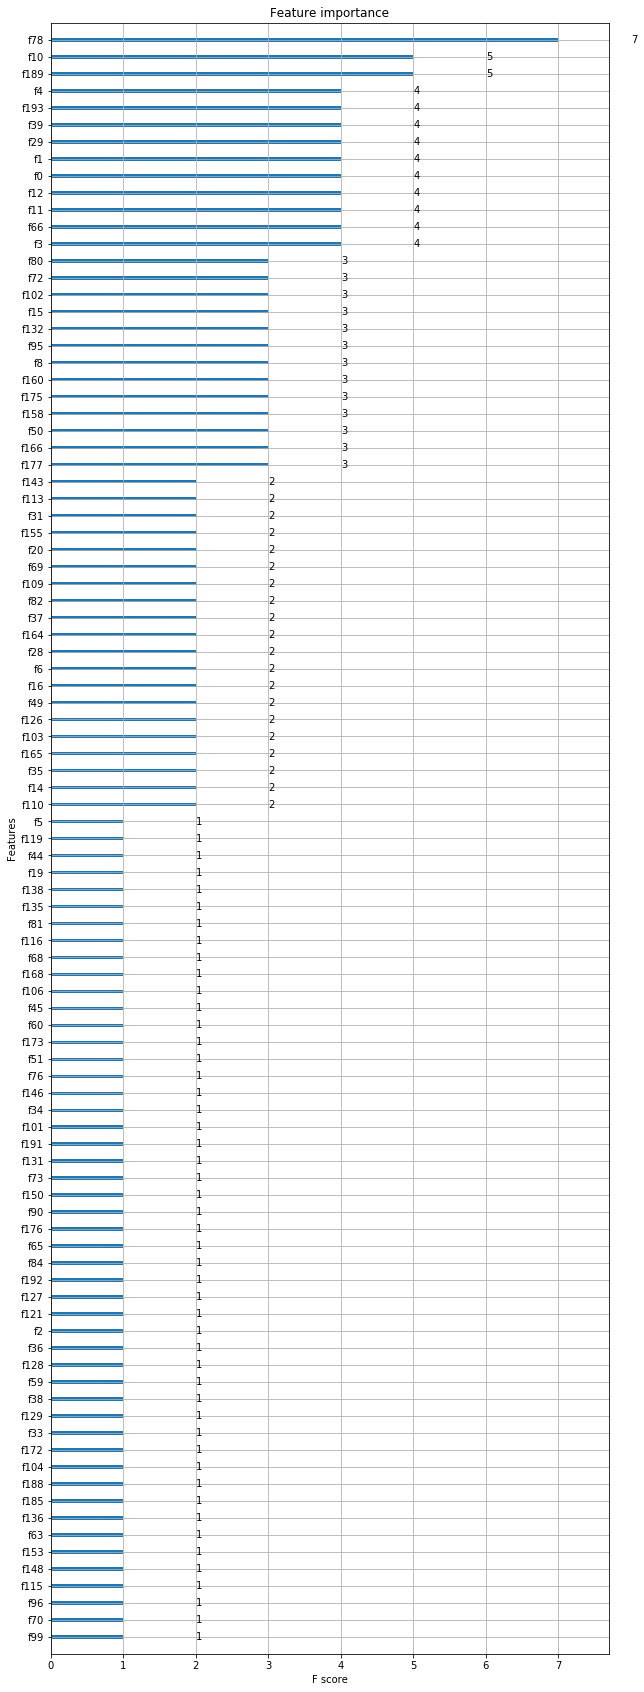

In [99]:
x=xgb.plot_importance(bst)
x.figure.set_size_inches(10, 30) 

### We see that sequences are correctly ordered that train set ends at index 220 and test begins at 221.

In [115]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

In [93]:
from math import sqrt

In [129]:
def run_model_ts(X_train,X_test,y_train,y_test,cols,prediction_window,bst):
    
    ll = []
    
    df_predictions = pd.DataFrame(ll)
    
    for col in cols:
        
        print('Model for step %s\n'%col)
        
        xgbpredict = xgb.DMatrix(X_test.values)

        y_pred = bst.predict(xgbpredict)
        
        df_predictions[col] = y_pred
        
        mse_err = mean_squared_error(y_pred,y_test[col].values)
        
        mae_err = mean_absolute_error(y_pred,y_test[col].values)
        
        mae_err_std = sqrt(abs(mae_err*(1-mae_err))/len(y_test))
        
        rmse = sqrt(mse_err)
        
        mape = mean_absolute_percentage_error(y_pred,y_test[col].values)

        mse_err_std = sqrt(abs(rmse*(1-rmse))/len(y_test))
    
        rmse_up = rmse+mse_err_std

        rmse_down = rmse-mse_err_std

        mae_up = mae_err+mae_err_std

        mae_down = abs(mae_err-mae_err_std)

        print('rmse: %.2f:[%.2f-%2f]'%(rmse,rmse_down,rmse_up) )

        print('mae_err: %.2f:[%.2f-%2f]'%(mae_err,mae_down,mae_up))
        
        mape_err_std = sqrt((mape*(1-mape))/len(y_test))
    
        mape_up = mape+mape_err_std

        mape_down = abs(mape-mape_err_std)

        print('mape: %.2f:[%.2f-%2f]\n'%(mape,mape_down,mape_up))
    
    df_predictions.index = prediction_window
    
    df_predictions['Date'] = df_predictions.index
    
    return df_predictions

In [130]:
cols = y_test.columns.tolist()
df_pred = run_model_ts(X_train,X_test,y_train,y_test,cols,prediction_window,bst)

Model for step SmallBags_mean(t+5)

rmse: 24955.19:[14767.48-35142.892631]
mae_err: 21121.52:[12498.90-29744.143695]
mape: 0.09:[0.03-0.199756]

Model for step LargeBags_mean(t+5)

rmse: 98536.16:[58309.14-138763.168997]
mae_err: 97089.43:[57453.04-136725.824172]
mape: 0.38:[0.18-0.573275]

Model for step XLargeBags_mean(t+5)

rmse: 244453.71:[144656.10-344251.310841]
mae_err: 243544.43:[144118.04-342970.821956]
mape: 0.94:[0.84-1.036934]



### We can see that predictions are within the range of one standard deviation or within 68% of data. If predictions need greater confidence interval that means that predictions are worse. We could use 2 standard deviation for confidence interval which would give us greater range. But in this case to interpret quality of predictions I used one standard deviation.

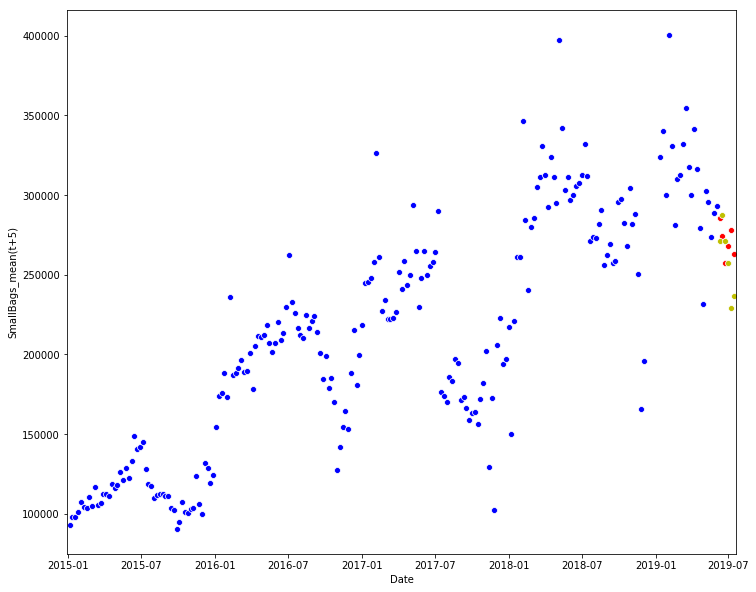

In [131]:
def plot_train_test(df1,df2,df_pred,col):
    
    fig,ax=plt.subplots(figsize=(12,10))
    
    
    ax=sns.scatterplot('Date','SmallBags_mean',data=df1,color='b')
    
    ax=sns.scatterplot('Date','SmallBags_mean',data=df2,color='r')
    
    ax = sns.scatterplot('Date',col,data=df_pred,color='y')
    
    ax.set_xlim(df1['Date'].min()-pd.Timedelta(1,unit='W'),df2['Date'].max()+pd.Timedelta(1,unit='W'))

df_train = df_all_filt[(df_all_filt['Date']<prediction_window[0])]
df_test = df_all_filt[(df_all_filt['Date']>=prediction_window[0])&(df_all_filt['Date']<=prediction_window[-1])]

plot_train_test(df_train,df_test,df_pred,'SmallBags_mean(t+5)')

### We can see that model catpured the trend well.

In [110]:
df_test_all = pd.merge(df_test[['Date','SmallBags_mean']],df_pred,on='Date',how='inner')

In [111]:
df_test_all['smallbags_diff'] = abs(df_test_all.SmallBags_mean-df_test_all['SmallBags_mean(t+5)'])

In [112]:
df_test_all

,Date,SmallBags_mean,SmallBags_mean(t+5),LargeBags_mean(t+5),XLargeBags_mean(t+5),smallbags_diff
0,2019-06-09,285693.159074,271064.062500,271064.062500,271064.062500,14629.096574
1,2019-06-16,274536.385185,287572.656250,287572.656250,287572.656250,13036.271065
2,2019-06-23,257571.508148,271322.218750,271322.218750,271322.218750,13750.710602
3,2019-06-30,267990.691111,257568.328125,257568.328125,257568.328125,10422.362986
4,2019-07-07,277972.170571,229333.140625,229333.140625,229333.140625,48639.029946
5,2019-07-14,263095.585143,236843.921875,236843.921875,236843.921875,26251.663268
